In [1]:
# project: p11
# submitter: rarora23 
# partner: none

In [2]:
from cleanMAC import * 
clean()
import os, json, csv
from collections import namedtuple

#imported from lab-11
import pandas as pd

def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

In [3]:
#functions created for p10 added in the cell to be further used in p11
def data(direct):
    contents = os.listdir(direct)
    contents.sort(reverse = True)
    return contents
full_data = data("full_data")

def path(data1,direct_content):
    paths = []
    for file in direct_content:
        paths.append(os.path.join(data1, file))
    return paths
full_paths =path("full_data",full_data)  

Tweet  = namedtuple("Tweet", ["tweet_id","username", "num_liked","length"])
def tweets_present(data_type,file):
    f = open(os.path.join(data_type, file), encoding="utf-8")
    reader = csv.DictReader(f)
    tweets_list = []
    for row in reader:
        try:
            tweet_id = row["tweet_id"]
            username = row["username"]
            num_liked = int(row["num_liked"])
            length = int(len(row["tweet_text"]))
            t = Tweet(tweet_id, username, num_liked, length) 
            tweets_list.append(t)
        except:
            continue
    f.close()
    return tweets_list

Tweet  = namedtuple("Tweet", ["tweet_id","username", "num_liked","length"])
def read_json(path, file):
    if file == None:
        f = open(path, encoding="utf-8")
    else:
        f = open(os.path.join(path, file), encoding="utf-8")
        
    json_str = f.read()
    data = json.loads(json_str)
    tweets_list2 = []
    for i in data:
        try:
            tweet_id = i
            username = data[i]["username"]
            length = int(len(data[i]["tweet_text"]))            
            num_liked = data[i]["num_liked"]            
            t = Tweet(tweet_id, username, num_liked, length) 
            tweets_list2.append(t)
        except:
            continue
    f.close()
    return tweets_list2

Tweet  = namedtuple("Tweet", ["tweet_id","username", "num_liked","length"])
tweet_last = []
for vals in full_paths:
    file_type = vals.split(".")[-1]
    try:
        if file_type == "json":
            tweet_last.extend(read_json("full_data",os.path.basename(vals)))
        if file_type == "csv":
            tweet_last.extend(tweets_present("full_data",os.path.basename(vals)))
        else:
            continue 
    except:
        continue

In [4]:
#q1 How many tweets are present in total?
count = 0
for tweets in tweet_last:
    count+=1
count

445

In [5]:
#q2 Which usernames appear in the dataset?
user = []
for tweet in tweet_last:
    if tweet.username not in tweet_last:
        user.append(tweet.username)    
user_dataset =set(user)
user_dataset

{'USERID_1',
 'USERID_10',
 'USERID_2',
 'USERID_3',
 'USERID_4',
 'USERID_5',
 'USERID_6',
 'USERID_7',
 'USERID_8',
 'USERID_9'}

In [6]:
#q3 How prolific is each user?
prof_user_list = []
prof_user_dict = {}
for usrs in tweet_last:
    if usrs.username not in tweet_last:
        prof_user_list.append(usrs.username)
for users in prof_user_list:
    if users not in prof_user_dict:
        prof_user_dict[users] = 1
    else:
        prof_user_dict[users] += 1
prof_user_dict        

{'USERID_1': 52,
 'USERID_7': 55,
 'USERID_10': 45,
 'USERID_9': 44,
 'USERID_4': 35,
 'USERID_6': 51,
 'USERID_3': 39,
 'USERID_2': 47,
 'USERID_5': 46,
 'USERID_8': 31}

In [7]:
#these functions are created to be used in further problems 

#buckets code has been used with refrence from mike's lecture 
def bucks(list_name):
    buckets_new = {}
    for most_liked in list_name:
        usr2 = most_liked.username
        if not usr2 in buckets_new:
            buckets_new[usr2] = []
        buckets_new[usr2].append(most_liked)
    return buckets_new
buckets = bucks(tweet_last)

#function to find highest like
def liking(bucket):
    likes_dict = {}
    for key in bucket:
        value = 0
        bucket[key]
        for i in bucket[key]:
            if likes(i.num_liked) > value:
                value = likes(i.num_liked)
        likes_dict[key] = value
    return likes_dict

#likes function previously used in p10 
def likes(num_like_val):
    if type(num_like_val) == int:
        return num_like_val
    elif num_like_val[:-1].isnumeric():
        if str(num_like_val)[-1].lower() == 'm':
            return (int) (float (num_like_val[:-1])*10**6)
        elif str(num_like_val)[-1].lower() == 'k':
            return (int) (float (num_like_val[:-1])*10**3)
    else: 
        return 0

In [8]:
#q4 What is the largest number of likes received on a tweet for each user?
largest_likes = liking(buckets)
largest_likes

{'USERID_1': 9393,
 'USERID_7': 9851,
 'USERID_10': 9936,
 'USERID_9': 9728,
 'USERID_4': 9618,
 'USERID_6': 9149,
 'USERID_3': 9678,
 'USERID_2': 869000000,
 'USERID_5': 9608,
 'USERID_8': 915000}

In [9]:
#q5 What is the length of the longest tweet for each user?
longest_tweet = {}
for keys in bucks(tweet_last):
    count = 0
    buckets[keys]
    for i in buckets[keys]:
        if i.length > count:
            count = i.length
    longest_tweet[keys] = count          
longest_tweet  

{'USERID_1': 150,
 'USERID_7': 144,
 'USERID_10': 136,
 'USERID_9': 137,
 'USERID_4': 138,
 'USERID_6': 145,
 'USERID_3': 138,
 'USERID_2': 138,
 'USERID_5': 146,
 'USERID_8': 145}

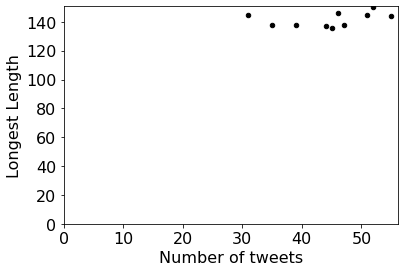

In [10]:
#q6 What is the relationship between the number of tweets by a user and the length of their longest tweet?
scatter(prof_user_dict,longest_tweet,"Number of tweets","Longest Length")

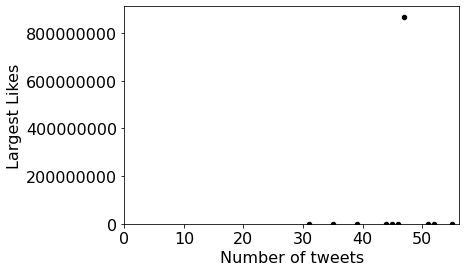

In [11]:
#q7 What is the relationship between the number of tweets and the largest number of likes?
scatter(prof_user_dict,largest_likes,"Number of tweets","Largest Likes")

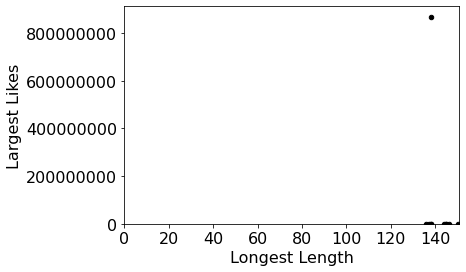

In [12]:
#q8 What is the relationship between the length of their longest tweet and the largest number of likes?
scatter(longest_tweet,largest_likes,"Longest Length","Largest Likes")

In [13]:
#q9 What is the username of the user represented by the outlier in the last two plots?
comp = 0
outlier_user = ""
for x in largest_likes:
    if largest_likes[x] > comp:
        comp = largest_likes[x]
        outlier_user = x

outlier_user 

'USERID_2'

In [14]:
#q10 What are the tweets made by that outlier user?
outlier_tweets = sorted(buckets[outlier_user],key = lambda x:likes(x.num_liked),reverse = True)
outlier_tweets

[Tweet(tweet_id='1467894593', username='USERID_2', num_liked='869M', length=136),
 Tweet(tweet_id='1467875163', username='USERID_2', num_liked=9891, length=69),
 Tweet(tweet_id='1467862806', username='USERID_2', num_liked=9465, length=68),
 Tweet(tweet_id='1467907751', username='USERID_2', num_liked=9048, length=110),
 Tweet(tweet_id='1467928764', username='USERID_2', num_liked=9026, length=41),
 Tweet(tweet_id='1467943007', username='USERID_2', num_liked=9000, length=130),
 Tweet(tweet_id='1467918682', username='USERID_2', num_liked=8884, length=102),
 Tweet(tweet_id='1467935121', username='USERID_2', num_liked=8740, length=37),
 Tweet(tweet_id='1467947913', username='USERID_2', num_liked=8578, length=36),
 Tweet(tweet_id='1467892667', username='USERID_2', num_liked=8270, length=20),
 Tweet(tweet_id='1467897316', username='USERID_2', num_liked=7890, length=64),
 Tweet(tweet_id='1467854917', username='USERID_2', num_liked=7741, length=30),
 Tweet(tweet_id='1467961106', username='USERID

In [15]:
#q11 If we exclude that most-liked tweet, what is the average of the remaining number of likes for that user?
count = 0
count_keeper =0
for y in outlier_tweets[1:]:
    count += y.num_liked
    count_keeper+=1
avg = count/count_keeper
avg

5003.565217391304

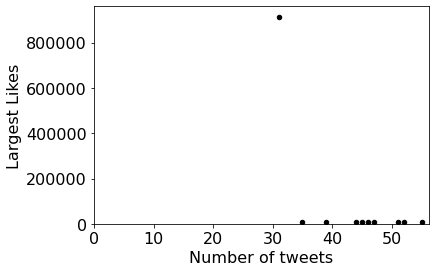

In [16]:
#q12 If we exclude that most-liked tweet, what is the relationship between the number of tweets and the largest number of likes?
num_liked_sort = sorted(tweet_last,key = lambda x:likes(x.num_liked),reverse = True)
y = num_liked_sort[1:]
y_val = liking(bucks(y))
scatter(prof_user_dict,y_val,"Number of tweets","Largest Likes")

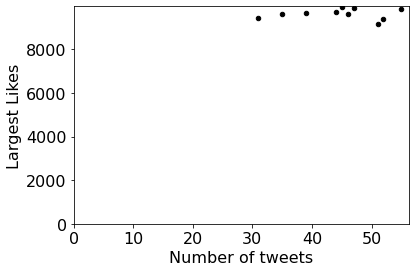

In [17]:
#q13 If we exclude the 2 most-liked tweets, what is the relationship between the number of tweets and the largest number of likes?
x =  num_liked_sort[2:]
x_val = liking(bucks(x))
scatter(prof_user_dict,x_val,"Number of tweets","Largest Likes")

In [18]:
def recursive(dirct):    
    rec_list = []
    contents = os.listdir(dirct)
    for y in contents:
        find_path = os.path.join(dirct, y)
        if os.path.isfile(find_path) and not y.startswith("."):
            rec_list.append(find_path)
        if os.path.isdir(find_path):
            rec_list.extend(recursive(find_path))
    return sorted(rec_list, reverse=True)

In [19]:
#q14 What are the files in the rb8 directory of the rb directory of the play directory?
recursive(os.path.join('play', 'rb','rb8'))

[]

In [20]:
#q15 What are the files in the ou directory of the play directory?
recursive(os.path.join('play', 'ou'))

['play/ou/v',
 'play/ou/quap/uikwe',
 'play/ou/quap/qonxu.txt',
 'play/ou/quap/aoq/qsonj',
 'play/ou/quap/aoq/aqnsa',
 'play/ou/b',
 'play/ou/a']

In [21]:
#q16 What are the files in the play directory?
recursive(os.path.join('play'))

['play/rb/rb9/89.csv',
 'play/rb/rb9/12.xls',
 'play/rb/ppt.ppt',
 'play/ou/v',
 'play/ou/quap/uikwe',
 'play/ou/quap/qonxu.txt',
 'play/ou/quap/aoq/qsonj',
 'play/ou/quap/aoq/aqnsa',
 'play/ou/b',
 'play/ou/a',
 'play/ls/qwe/usun.pdf',
 'play/ls/qwe/iuqwe.json',
 'play/ls/mf.py',
 'play/ls/lu.txt']

In [22]:
#q17 What are the files in the others directory of the recursive directory?
recursive(os.path.join('recursive', 'others'))

['recursive/others/USERID_9.json',
 'recursive/others/USERID_8.json',
 'recursive/others/USERID_7.json',
 'recursive/others/USERID_6.json',
 'recursive/others/USERID_5.json',
 'recursive/others/USERID_10.json']

In [23]:
#q18 What are the files in the recursive directory?
rd = recursive(os.path.join('recursive'))
rd

['recursive/others/USERID_9.json',
 'recursive/others/USERID_8.json',
 'recursive/others/USERID_7.json',
 'recursive/others/USERID_6.json',
 'recursive/others/USERID_5.json',
 'recursive/others/USERID_10.json',
 'recursive/USERID_4/true/tweets.json',
 'recursive/USERID_4/false/tweets.json',
 'recursive/USERID_3/tweets.json',
 'recursive/USERID_2/tweets.json',
 'recursive/USERID_1/tweets.json']

In [24]:
def find_tweet(lst):
    all_tweet = []
    for y in lst :
        all_tweet.extend(read_json(y,None))
    return all_tweet
def cnt(tweets):
    count = 0
    for twts in tweets:
        count+=1
    return count

In [25]:
#q19 How many tweets are in the files in the USERID_4 directory of the recursive directory?
rec_user4 = recursive(os.path.join('recursive', 'USERID_4'))
cnt(find_tweet(rec_user4))

17

In [26]:
#q20 How many tweets are in the files in the recursive directory?
cnt(find_tweet(rd))

200